In [1]:
import keras
from keras.layers import *
from keras.models import Model, Sequential
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [9]:
X_ind_norm = np.load("./DataSim/inputX_verano_Independencia_norm.npy")
y_ind = np.load("./DataSim/targetY_verano_Independencia.npy").astype('float32')

N,T,W,H,Ch = X_ind_norm.shape
X_ind_norm.shape

(998, 48, 40, 50, 15)

In [ ]:
#only a subset of the components


In [10]:
#o predecir el maximo en etiqueta...
y_ind = np.nanmax(y_ind,axis=1)
print("Maximo calculado")
y_ind.shape

Maximo calculado


(998,)

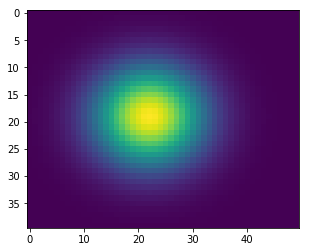

In [18]:
plt.imshow(X_ind_norm[0,30,:,:,-1])

In [26]:
#3d CNN
i1 = Input(shape=(T,W,H,3)) #four dimensional array (3 without the channels of the image) 
#extraer caracteristicas
kernel_size = (3,3,3) # tercera es el largo temporal
f1 = Conv3D(16,kernel_size, strides=(1, 1, 1), padding='same', data_format=None, activation='relu')(i1)
f1 = MaxPool3D((2,2,2))(f1)
#drop
f2 = Conv3D(32,kernel_size, strides=(1, 1, 1), padding='same', data_format=None, activation='relu')(f1)
f2 = MaxPool3D((2,2,2))(f2)
#drop

#mas conv3D?
f3 = Conv3D(64,kernel_size, strides=(1, 1, 1), padding='same', data_format=None, activation='relu')(f2)
f3 = MaxPool3D((2,2,2))(f3)

#flatten
fla = Flatten()(f3)

#dense
f3 = Dense(512,activation='relu')(fla)

#clasificacion
f4 = Dense(1,activation='linear')(f3)

arquitectura = Model(i1,f4)
arquitectura.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 48, 40, 50, 3)     0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 48, 40, 50, 16)    1312      
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 24, 20, 25, 16)    0         
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 24, 20, 25, 32)    13856     
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 12, 10, 12, 32)    0         
_________________________________________________________________
conv3d_9 (Conv3D)            (None, 12, 10, 12, 64)    55360     
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 6, 5, 6, 64)       0         
__________

In [23]:
X_ind_norm = X_ind_norm[:,:,:,:,:3]

In [ ]:
arquitectura.compile(loss='mse',optimizer='rmsprop')
arquitectura.fit(X_ind_norm, y_ind, batch_size=128, epochs=10)

Epoch 1/10
128/998 [==>...........................] - ETA: 420s - loss: 3612.3110